In [52]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "linear_regression_housing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
import pandas as pd

TRAIN_PATH = r"C:\Users\ninja\OneDrive\Documents\Python\Machine Learning\datasets\linear_regression\train.csv"
TEST_PATH = r"C:\Users\ninja\OneDrive\Documents\Python\Machine Learning\datasets\linear_regression\test.csv"

def load_training_data():
    return pd.read_csv(TRAIN_PATH)

def load_testing_data():
    return pd.read_csv(TEST_PATH)

In [54]:
train = load_training_data()
test = load_testing_data()

In [55]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
def process_data(data,Train = True):
    processed_data = pd.DataFrame()
    processed_data["SquareArea"] = data["LotArea"]
    processed_data["Bedroom"] = data["BedroomAbvGr"]
    processed_data["Bathroom"] = data["HalfBath"]+data["FullBath"]+data["BsmtHalfBath"]+data["BsmtFullBath"]
    if (Train):
        processed_data["SalePrice"] = data["SalePrice"]
    return processed_data

In [57]:
train = process_data(train)
x_test = process_data(test,Train=False)
x_test = x_test.fillna(0)
train.fillna(0)
ids = test.pop('Id')

In [58]:
y_train = train["SalePrice"].to_numpy()
x_train = train.drop(columns="SalePrice")


In [59]:
feature_names = list(x_train.columns)

In [60]:
def plot_against_features(x_train,y_train,feature_names):
    for feature_name in feature_names:
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train[feature_name], y_train, color='blue', alpha=0.5)
        plt.title("{} vs Sale Price".format(feature_name))
        plt.xlabel("{}".format(feature_name))
        plt.ylabel("Sale Price")
        plt.grid(True)
        plt.show()

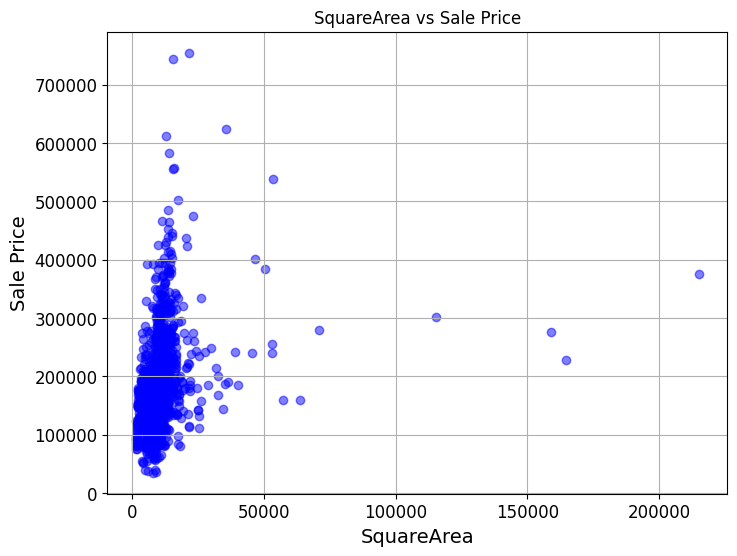

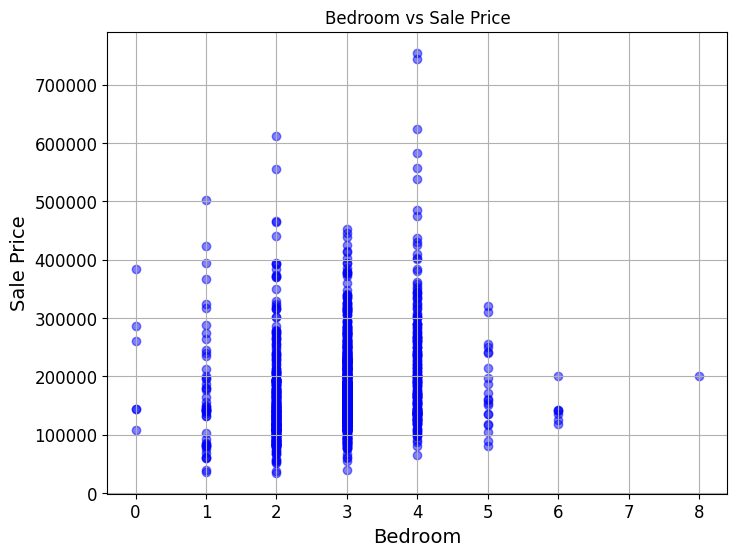

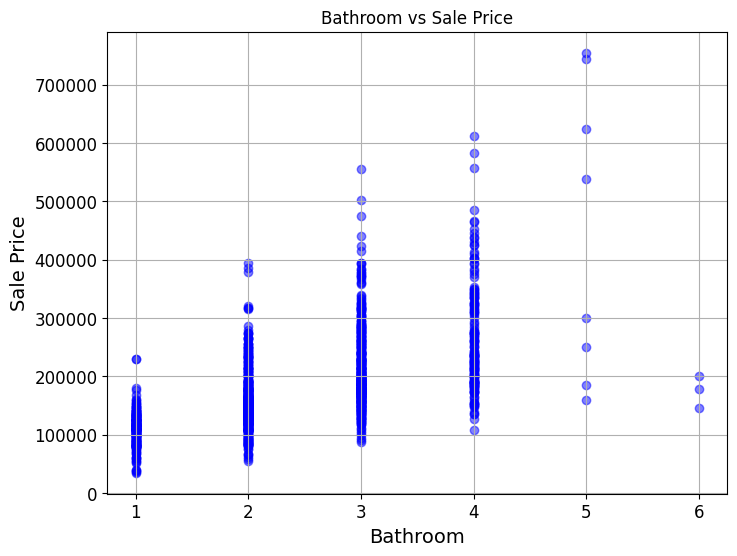

In [61]:
# Before scaling
plot_against_features(x_train,y_train,feature_names)

In [62]:
def feature_scale(train,test):
    mean = train.mean()
    std = train.std()
    train_scaled = (train-mean)/std
    test_scaled = (test-mean)/std
    return [train_scaled,test_scaled]

In [63]:
x_train , x_test = feature_scale(x_train,x_test)

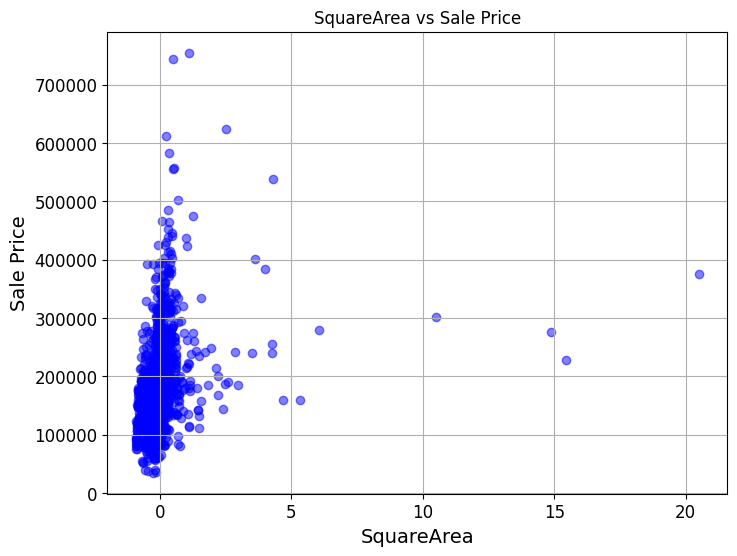

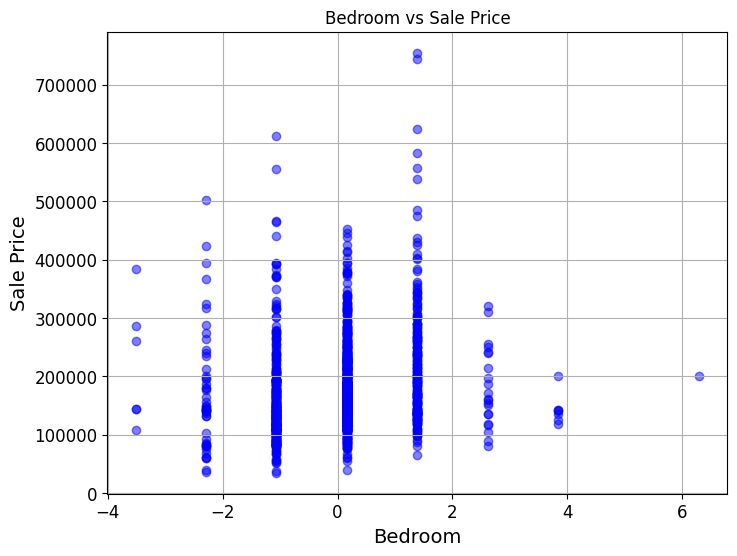

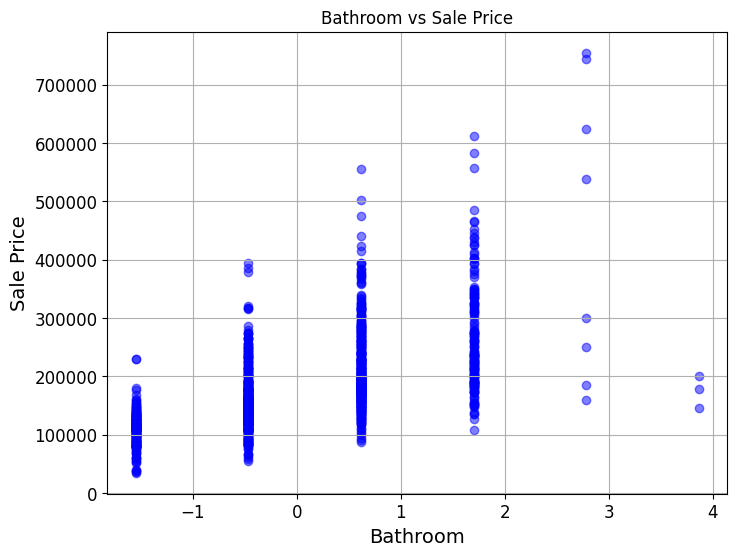

In [64]:
# After scaling
plot_against_features(x_train,y_train,feature_names)

In [65]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [66]:
def cost_function(w,b,x,y):
    m = len(x)
    predictions = np.dot(x, w) + b  # Predicted values
    sq_diff = np.square(predictions - y)  # Squared differences
    cost = np.sum(sq_diff) / (2 * m)  # Mean Squared Error
    return cost

In [67]:
def initialize_values(feature_count):
    weights = np.zeros(feature_count)
    bias = 0
    return [weights,bias]

In [68]:
def gradient_descent(x_train,y_train,alpha):
    feature_count = x_train.shape[1]
    m = len(x_train) # Sample count
    weights,bias = initialize_values(feature_count)
    max_iterations = 10000
    epsilon = 0.1
    original_cost = cost_function(weights, bias, x_train, y_train)

    for _ in range(max_iterations):
        predictions = np.dot(x_train,weights) + bias
        errors = predictions - y_train

        weight_gradient = np.dot(x_train.transpose(),errors)
        bias_gradient = np.sum(errors)

        weights -= alpha*weight_gradient/m
        bias -= alpha*bias_gradient/m

        new_cost = cost_function(weights, bias, x_train, y_train)

        if np.abs(original_cost - new_cost) < epsilon:
            return [weights,bias]
        elif new_cost>original_cost:
            print("This overshoots")
            return False
        
        original_cost = new_cost
    
    print("Too Long to converge")
    return False

In [73]:
feature_count = x_train.shape[1]
weights,bias = initialize_values(feature_count)
learning_rate = 0.01
max_attempts = 20

for i in range(max_attempts):
    print ("Attempt No: ",i+1," Learning Rate: ",learning_rate)
    result = gradient_descent(x_train,y_train,learning_rate)
    if (result):
        weights,bias = result
        break
    else:
        learning_rate+=0.1

print(weights,bias)

Attempt No:  1  Learning Rate:  0.01
[12445.8123908   -589.80793216 46559.15927986] 180920.4671212738


In [74]:
def predict(x_test,weights,bias):
    return np.dot(x_test,weights)+bias

In [75]:
ans = predict(x_test,weights,bias)
output = pd.DataFrame({'Id': ids,'SalePrice': ans.squeeze()})
csv_file_path = r"C:\Users\ninja\OneDrive\Documents\Python\Machine Learning\predictions\linear_regression_housing.csv"
output.to_csv(csv_file_path,index=False)